In [ ]:
!pip install pycryptodome

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# Task 1
Complete the encrypt() method

Mode:



*   1 = ECB
*   2 = CBC
*   3 = OFB




In [ ]:
def encrypt(pt, key, mode, iv=None):

    key = bytes.fromhex(key)
    iv = bytes.fromhex(iv) if iv else None

    pt = pad(pt.encode(), AES.block_size)
    #iv = iv or get_random_bytes(AES.block_size)

    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pt)
        return ciphertext.hex()


    iv = iv or get_random_bytes(AES.block_size)

    if mode == 2:
        cipher = AES.new(key, AES.MODE_CBC, iv)
        ciphertext = cipher.encrypt(pt)
        return ciphertext.hex()

    if mode == 3:
        cipher = AES.new(key, AES.MODE_CTR, nonce=iv)
        ciphertext = cipher.encrypt(pt)
        return ciphertext.hex()

# Task 2
Complete the decrypt method

In [ ]:
def decrypt(ct, key, mode, iv=None):

    key = bytes.fromhex(key)
    iv = bytes.fromhex(iv) if iv else None


    ct = bytes.fromhex(ct)


    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)
        # print(cipher.decrypt(ct))
        decrypted = unpad(cipher.decrypt(ct), AES.block_size)

        return decrypted.decode()

    if mode == 2:
        cipher = AES.new(key, AES.MODE_CBC, iv)
        decrypted = unpad(cipher.decrypt(ct), AES.block_size)
        return decrypted.decode()

    if mode == 3:
        cipher = AES.new(key, AES.MODE_CTR, nonce=iv)
        decrypted = cipher.decrypt(ct)
        return decrypted.decode()



Key: **0d5b4267c2370ecf67bd9b9bdba7bfe0**


IV: **662bc70aab50862d984d2cce641bb1e9**


plaintext: **435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5**

In [ ]:
pt = "435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5"
key = "0d5b4267c2370ecf67bd9b9bdba7bfe0"
iv = "662bc70aab50862d984d2cce641bb1e9"

In [ ]:
ct = encrypt(pt,key,1)
try:
  assert(ct=="a8eeba8300fe4570882554c0d804959c9c6d5e7c440c5023ab5cff6be12ca8efc72a447f76475ced61462f307372aaf8")
  print("[ECB]: Test passed")
except:
  print("[ECB]: Wrong answer")

ct2 = encrypt(pt,key,2,iv)
try:
  assert(ct2=="880853b4e42a86bc1419b2ec8e349515f3484d312f14f301c6567d71b94dc52cc183cfbede586ab023b7e6831b9351ee")
  print("[CBC]: Test passed")
except:
  print("[CBC]: Wrong answer")

[ECB]: Test passed
[CBC]: Test passed


In [ ]:
pt = decrypt(ct,key,1)
try:
  assert(pt=="435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5")
  print("[ECB]: Test passed")
except:
  print("[ECB]: Wrong answer")

pt = decrypt(ct2,key,2,iv)
try:
  assert(pt=="435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5")
  print("[CBC]: Test passed")
except:
  print("[CBC]: Wrong answer")

[ECB]: Test passed
[CBC]: Test passed


# Task 3

Encrypt the downloaded image using ECB and CBC mode and compare

In [ ]:
# prompt: download image from google drive link

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1HPJ8e48uR54mNgPUj6d41VSpR08AkiIL',
                                    dest_path='./original.bmp')

In [ ]:
import PIL

def view_image(filename):
  img = PIL.Image.open(filename)
  display(img)

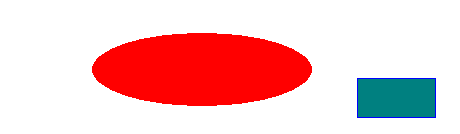

In [ ]:
with open("original.bmp", "rb") as f:
  pt = f.read()

view_image("original.bmp")

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from Crypto.Util import Counter

def encrypt1(pt, key, mode, iv=None):
    if isinstance(key, bytes):
        pass
    else:
        raise ValueError("Key must be in bytes format")

    pt = pad(pt, AES.block_size)

    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pt)
        return ciphertext

    if iv is None:
        iv = get_random_bytes(AES.block_size)

    if isinstance(iv, bytes):
        pass
    else:
        raise ValueError("IV must be in bytes format if provided")

    if mode == 2:
        cipher = AES.new(key, AES.MODE_CBC, iv)
        ciphertext = cipher.encrypt(pt)
        return iv + ciphertext

    if mode == 3:
        ctr = Counter.new(128, iv)
        cipher = AES.new(key, AES.MODE_CTR, counter=ctr)
        ciphertext = cipher.encrypt(pt)
        return ciphertext




In [ ]:
key = b'\r[Bg\xc27\x0e\xcfg\xbd\x9b\x9b\xdb\xa7\xbf\xe0'
iv = b'\xb6p\x08c-\xa3\xbc)W\x82\x92\x9az\x06e\x85'

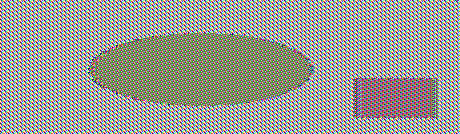

In [ ]:
ct = encrypt1(pt,key,1)
ct = list(ct)
ct[:54] = list(pt)[:54] # First 54 bytes are bmp header ( Needs to be correct for viewing)
ct = bytes(ct)
with open("encrypted_ecb.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_ecb.bmp")

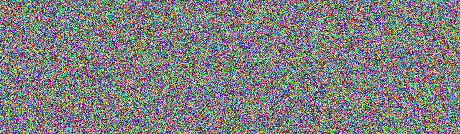

In [ ]:
ct = encrypt1(pt,key,2)
ct = list(ct)
ct[:54] = list(pt)[:54]
ct = bytes(ct)
with open("encrypted_cbc.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_cbc.bmp")

# Task 4

Compare decrypted texts of different encryption modes when encrypted data is corrupted

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
from Crypto.Util import Counter

def encrypt1(pt, key, mode, iv=None):
    if isinstance(key, bytes):
        pass
    else:
        raise ValueError("Key must be in bytes format")

    pt = pad(pt.encode(), AES.block_size)

    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pt)
        return ciphertext

    if mode == 2:
        if iv is None:
            iv = get_random_bytes(AES.block_size)
        cipher = AES.new(key, AES.MODE_CBC, iv)
        ciphertext = cipher.encrypt(pt)
        return iv + ciphertext

    if mode == 3:  # CTR mode
        if iv is None:
            iv = get_random_bytes(AES.block_size)
        cipher = AES.new(key, AES.MODE_CTR, counter=Counter.new(128, initial_value=int.from_bytes(iv, 'big')))
        return cipher.encrypt(pt)



In [ ]:
def decrypt1(ct, key, mode, iv=None):
    if isinstance(key, bytes):
        pass
    else:
        raise ValueError("Key must be in bytes format")

    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)
        pt = unpad(cipher.decrypt(ct), AES.block_size)
        try:
            return pt.decode('utf-8')
        except UnicodeDecodeError:
            return pt

    if mode == 2:
        iv = ct[:AES.block_size]
        ct = ct[AES.block_size:]
        cipher = AES.new(key, AES.MODE_CBC, iv)
        pt = unpad(cipher.decrypt(ct), AES.block_size)
        try:
            return pt.decode('utf-8')
        except UnicodeDecodeError:
            return pt

    if mode == 3:
        ctr = Counter.new(128, iv)
        cipher = AES.new(key, AES.MODE_CTR, counter=ctr)
        pt = cipher.decrypt(ct)
        try:
            return pt.decode('utf-8')
        except UnicodeDecodeError:
            return pt




In [ ]:
pt = "CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447"
key = b'\xb4\xe3\x01\xb7(\x93\x98*\x8b\xf8\xe8D\x80\xa6[\x85'
iv = b'\xb2\xeb~\xb3|d]\xa6B\x7f\x18\x9b\xac\xf2\xe0\x14'

In [ ]:
# Encrypt using ECB
ct = encrypt1(pt,key,1)
#ct = list(ct)
ct = bytearray(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using ECB
pt = decrypt1(ct,key,1)
print(pt)

b'CSE447CSE447CSE4\xe4\xa3\xb9\x08S\xd9\xb1\xeb3\xfc.p\xeerKvE447CSE447CSE447CSE447CSE447CSE447CSE447'


In [ ]:
# Encrypt using CBC
ct = encrypt1(pt,key,2,iv)
#ct = list(ct)
ct = bytearray(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using CBC
pt = decrypt1(ct,key,2,iv)
print(pt)

b'CSE447CSE447CSE4\xe4\xa3\xb9\x08S\xd9\xb1\xeb3\xfc.p\xeerKvE447CSE447CSE447CSE447CSE447CSE447CSE447'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

pt = "CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447"
key = b'\xb4\xe3\x01\xb7(\x93\x98*\x8b\xf8\xe8D\x80\xa6[\x85'
iv = b'\xb2\xeb~\xb3|d]\xa6B\x7f\x18\x9b\xac\xf2\xe0\x14'

def encrypt1(pt, key, mode, iv):
    if isinstance(pt, str):
        pt = pt.encode()


    pt = pad(pt, AES.block_size)


    cipher = AES.new(key, AES.MODE_OFB, iv)
    ct = cipher.encrypt(pt)

    return ct

def decrypt1(ct, key, mode, iv):

    cipher = AES.new(key, AES.MODE_OFB, iv)
    pt = cipher.decrypt(ct)


    pt = unpad(pt, AES.block_size)
    return pt




In [ ]:
# Encrypt using OFB
ct = encrypt1(pt,key,3,iv)
#ct = list(ct)
ct = bytearray(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using OFB
pt = decrypt1(ct,key,3,iv)
print(pt)

b'CSE447CSE447CSE447CSE447CSE446CSE447CSE447CSE447CSE447CSE447CSE447CSE447'
